# ANN DA - Lab 1

In [12]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

## 2.2 Implementation of the Delta rule

Setting up the variables

In [13]:
# Adding biais
def with_biais(mat):
    biais = np.ones(shape = (1,mat.shape[1]))
    mat_biais = np.concatenate((mat,biais), axis = 0)
    return(mat_biais)

# Initilaizing the weights
def initialize_weights(n_row, n_col):
    return(np.random.normal(size = (n_row,n_col)))

Defining Delta rule

In [14]:
def delta_rule(patterns, targets, weights, learning_rate):
    delta_weights = - learning_rate * ((weights @ patterns) - targets) @ patterns.T
    return(delta_weights)

def delta_rule_epochs(epochs, patterns, targets, weights, learning_rate = 0.001):
    new_weights = np.array(weights)
    for i in range(epochs):
        delta_weights = delta_rule(patterns, targets, new_weights, learning_rate)
        new_weights += delta_weights
    return(new_weights)

Test with some examples:

In [15]:
# Initializing patterns and targets (example of 'sign of x' problem)
patterns = np.array([[-1,1,-1,1],[-1,-1,1,1]])
patterns_biais = with_biais(patterns)
targets = np.array([-1,1,-1,1])
weights = initialize_weights(1,3)


print('We want to get targets: ', targets)
print('\nInitial random weights: ', weights)
print('Results with intial random weights: ', weights @ patterns_biais)

print('\n... Calculation of new weights for epochs = 20 and learning_rate = 0.001 ...')
new_weights_0001 = delta_rule_epochs(20, patterns_biais, targets, weights, learning_rate = 0.001)
print('New weights: ', new_weights_0001)
print('Result with new weights: ', new_weights_0001 @ patterns_biais)

print('\n... Calculation of new weights for epochs = 20 and learning_rate = 0.01 ...')
new_weights_001 = delta_rule_epochs(20, patterns_biais, targets, weights, learning_rate = 0.01)
print('New weights: ', new_weights_001)
print('Result with new weights: ', new_weights_001 @ patterns_biais)

We want to get targets:  [-1  1 -1  1]

Initial random weights:  [[-0.70901134  0.31249734  0.71079234]]
Results with intial random weights:  [[ 1.10730634 -0.31071634  1.73230101  0.31427833]]

... Calculation of new weights for epochs = 20 and learning_rate = 0.001 ...
New weights:  [[-0.57736323  0.28842512  0.65603877]]
Result with new weights:  [[ 0.94497688 -0.20974959  1.52182713  0.36710066]]

... Calculation of new weights for epochs = 20 and learning_rate = 0.01 ...
New weights:  [[0.24461283 0.13812458 0.31417194]]
Result with new weights:  [[-0.06856547  0.42066019  0.2076837   0.69690935]]


## 2.3 Implementation of a two-layer perceptron

In [16]:
def phi(x):
    return((np.divide(2,(1+np.exp(-x)))-1))

### 2.3.1 The forward  pass

### 2.3.2 The backward pass

### 2.3.3 Weights update

All together:

In [17]:
def fwd_bwd_wup(patterns, targets, weights, weights_hidden, eta, n_hidden, epochs, alpha):
    w = np.array(weights)
    v = np.array(weights_hidden)
    dw, dv = 0, 0
    patterns_biais = with_biais(patterns)
    for i in range(epochs):
        # forward pass
        h_in = w @ patterns_biais
        h_out = with_biais(phi(h_in))
        o_in = v @ h_out
        o_out = phi(o_in)

        # backward pass
        delta_o = (o_out-targets) * (1+o_out) * (1-o_out) * 0.5
        delta_h = (v.T @ delta_o) * ((1 + h_out) * (1 - h_out)) * 0.5
        delta_h = delta_h[range(n_hidden),:]

        # weights update
        dw = (dw * alpha) - (delta_h @ patterns_biais.T) * (1-alpha)
        dv = (dv * alpha) - (delta_o @ h_out.T) * (1-alpha)
        w += dw * eta
        v += dv * eta
        
    return(w,v)

Test with XOR example, n_hidden = 

In [18]:
patterns = np.array([[-1,1,-1,1],[-1,-1,1,1]])
targets = np.array([-1,1,1,-1])
n_hidden = 5

w = initialize_weights(n_row = n_hidden, n_col = 3)
v = initialize_weights(n_row = 1, n_col = n_hidden + 1)

def fast_forward(patterns, w, v):
    h_in = w @ with_biais(patterns)
    h_out = with_biais(phi(h_in))
    o_in = v @ h_out
    o_out = phi(o_in)
    return(o_out)

print('First output: \n')
print(fast_forward(patterns, w, v))

First output: 

[[-0.0488646  -0.87306323  0.27875057 -0.82239485]]


In [19]:
new_w, new_v = fwd_bwd_wup(patterns = patterns, targets = targets, weights = w, weights_hidden = v,
            eta = 0.01, n_hidden = n_hidden, epochs = 1000, alpha = 0.9)

In [20]:
print('After computation output: \n')
print(fast_forward(patterns, new_w, new_v))

After computation output: 

[[-0.48505241  0.38711448  0.59653549 -0.47520405]]


### 2.4 Monitoring the Learning Process

## 3. Assignment - Part 1

### 3.1 Classification with a single-layer perceptron

#### 3.1.1 Generation of linearly-separable data

In [21]:
def generate_points(n, m_A, m_B, sigma_A, sigma_B):
    class_A = np.array([np.random.randn(n)*sigma_A + m_A[0], np.random.randn(n)*sigma_A + m_A[1]]).T
    class_B = np.array([np.random.randn(n)*sigma_B + m_B[0], np.random.randn(n)*sigma_B + m_B[1]]).T

    # Shuffling
    dataset_ini = np.concatenate([class_A, class_B])
    classes_ini = np.array([1]*n+[-1]*n)
    seq = [i for i in range(len(dataset_ini))]
    np.random.shuffle(seq)
    dataset = dataset_ini[seq]
    classes = classes_ini[seq]
    return(dataset, classes)

dataset, classes = generate_points(n = 100, m_A = [2., 2], m_B = [-2., -2.], sigma_A = 0.5, sigma_B = 0.5)

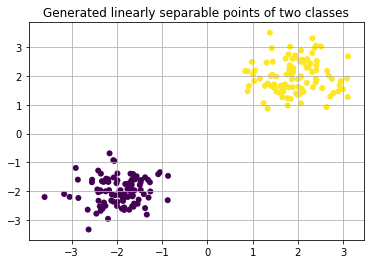

In [22]:
fig, ax = plt.subplots()
ax.scatter(x = dataset[:,0], y = dataset[:,1], c=classes, label=classes, edgecolors='none')
ax.grid(True)
ax.set_title('Generated linearly separable points of two classes')
plt.show()

#### 3.1.2 Classifcation with a single-layer perceptron and analysis

In [23]:
def learning_perceptron(patterns, targets, weights, eta):
        delta_weights = - eta * (np.sign(weights @ patterns) - targets) @ patterns.T / 2
        return(delta_weights)
    
def learning_perceptron_epochs(epochs, patterns, targets, weights, eta):
    new_weights = np.array(weights)
    error_class = []
    weights_list = np.array(weights)
    for i in range(epochs):
        error_class.append(int(np.sum(abs(np.sign(new_weights @ patterns) - targets))/2))
        delta_weights = learning_perceptron(patterns, targets, new_weights, eta)
        new_weights += delta_weights
        weights_list = np.concatenate([weights_list,new_weights])
    return(new_weights, error_class, weights_list)

def delta_rule_2(patterns, targets, weights, eta):
    delta_weights = - eta * ((weights @ patterns) - targets) @ patterns.T
    return(delta_weights)

def delta_rule_epochs_2(epochs, patterns, targets, weights, eta):
    new_weights = np.array(weights)
    error_class = []
    weights_list = np.array(weights)
    for i in range(epochs):
        error_class.append(int(np.sum(abs(np.sign(new_weights @ patterns) - targets))/2))
        delta_weights = delta_rule_2(patterns, targets, new_weights, eta)
        new_weights += delta_weights
        weights_list = np.concatenate([weights_list,new_weights])
    return(new_weights, error_class, weights_list)

In [24]:
weights = initialize_weights(n_row = 1, n_col = 3)
eta = 0.001
dataset_biais = with_biais(np.transpose(dataset))

new_weights_lp, error_lp, weights_list_lp = learning_perceptron_epochs(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
new_weights_dr, error_dr, weights_list_dr = delta_rule_epochs_2(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)

##### Plotting the animations

In [25]:
def from_Weights_List_To_Points(weights_list, x_lim_min, x_lim_max):
    y_min =  np.array(-weights_list[:,2]/weights_list[:,1] - x_lim_min*weights_list[:,0]/weights_list[:,1])
    y_max =  np.array(-weights_list[:,2]/weights_list[:,0] - x_lim_max*weights_list[:,0]/weights_list[:,1])
    x_min = np.array(x_lim_min*np.ones(len(y_min)))
    x_max = np.array(x_lim_max*np.ones(len(y_max)))
    return(x_min,x_max,y_min,y_max)

x_min_lp, x_max_lp, y_min_lp, y_max_lp = from_Weights_List_To_Points(weights_list_lp, -5, 5)
x_min_dr, x_max_dr, y_min_dr, y_max_dr = from_Weights_List_To_Points(weights_list_dr, -5, 5)

In [26]:
import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = 'C:/FFmpeg/bin/ffmpeg'

def animation_lines(x_min, x_max, y_min, y_max):
    fig, ax = plt.subplots()
    min_y = min(np.min(y_min), np.min(y_max))
    max_y = max(np.max(y_min), np.max(y_max))
    
    def animate(i):
        ax.clear()
        ax.scatter(x = dataset[:,0], y = dataset[:,1], c=classes, label=classes, edgecolors='none')
        ax.set_xlim(left=x_min[0], right = x_max[0])
        ax.set_ylim(bottom=min_y, top = max_y)
        line = ax.plot([x_min[i], x_max[i]], [y_min[i], y_max[i]])  # update the data
        return line

    ani = animation.FuncAnimation(fig, animate, len(y_min), interval=1000, blit=True)
    return(HTML(ani.to_html5_video()))

For learning perceptron

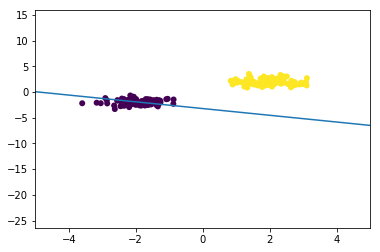

In [27]:
animation_lines(x_min_lp, x_max_lp, y_min_lp, y_max_lp)

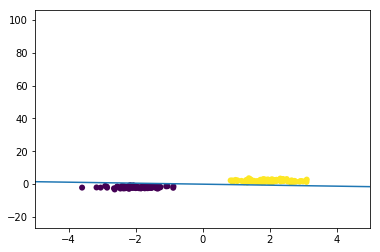

In [28]:
animation_lines(x_min_dr, x_max_dr, y_min_dr, y_max_dr)

##### Looking for the effect of eta

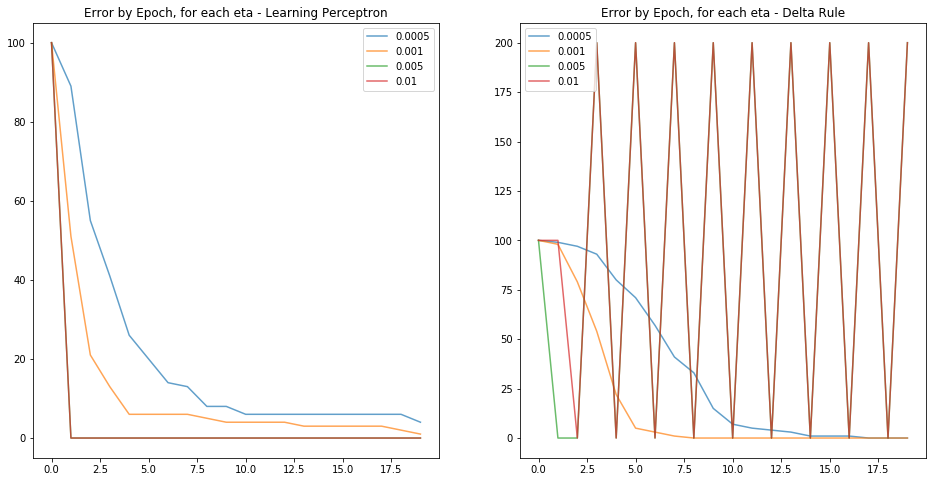

In [29]:
etas = [0.0005, 0.001 ,0.005, 0.01]

error_lp_list = []
error_dr_list = []

fig, axs = plt.subplots(1,2, figsize=(16, 8))

for eta in etas:
    new_weights_lp, error_lp, weights_list_lp = learning_perceptron_epochs(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
    new_weights_dr, error_dr, weights_list_dr = delta_rule_epochs_2(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
    axs[0].plot([i for i in range(len(error_lp))], error_lp, label = eta, alpha = 0.7)
    axs[1].plot([i for i in range(len(error_dr))], error_dr, label = eta, alpha = 0.7)

axs[0].legend()
axs[0].set_title('Error by Epoch, for each eta - Learning Perceptron')
axs[1].legend()
axs[1].set_title('Error by Epoch, for each eta - Delta Rule')
plt.show()

##### Introducing the delta rule 1 by 1

In [30]:
def delta_rule_1by1(pattern, target, weights, eta):
    delta_weights = - eta * (sum([pattern[i]*weights[0,i] for i in range(len(pattern))] - target)) * pattern.T
    return(delta_weights)

def delta_rule_epochs_1by1(epochs, patterns, targets, weights, eta):
    new_weights = np.array(weights)
    error_class = []
    weights_list = np.array(weights)
    for i in range(epochs):
        for j in range(len(patterns[0,:])):
            delta_weights = delta_rule_1by1(patterns[:,j], targets[j], new_weights, eta)
            new_weights += delta_weights
        error_class.append(int(np.sum(abs(np.sign(new_weights @ patterns) - targets))))
        weights_list = np.concatenate([weights_list,new_weights])
    return(new_weights, error_class, weights_list)

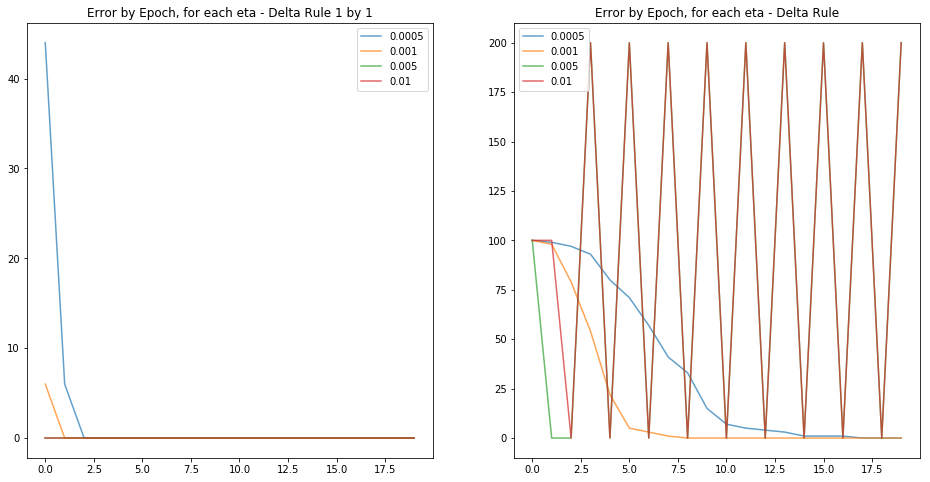

In [31]:
etas = [0.0005, 0.001 ,0.005, 0.01]
fig, axs = plt.subplots(1,2, figsize=(16, 8))

for eta in etas:
    new_weights_dr_1by1, error_1by1, weights_list_1by1 = delta_rule_epochs_1by1(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
    new_weights_dr, error_dr, weights_list_dr = delta_rule_epochs_2(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
    axs[0].plot([i for i in range(len(error_1by1))], error_1by1, label = eta, alpha = 0.7)
    axs[1].plot([i for i in range(len(error_dr))], error_dr, label = eta, alpha = 0.7)

axs[0].legend()
axs[0].set_title('Error by Epoch, for each eta - Delta Rule 1 by 1')
axs[1].legend()
axs[1].set_title('Error by Epoch, for each eta - Delta Rule')
plt.show()

Sensitivity of sample to randomisation of input:

In [32]:
error_1by1_list = []

def first_to_0(x):
    for i in x:
        if i == 0:
            result = i
            break
    return(result)

for i in range(10):
    seq = [i for i in range(len(dataset_biais[0,:]))]
    np.random.shuffle(seq)
    dataset_biais2 = dataset_biais[:,seq]
    targets2 = classes[seq]
    
    new_weights_lp, error_lp, weights_list_lp = delta_rule_epochs_1by1(epochs = 20, patterns= dataset_biais2,
                                                      targets=targets2,weights= weights,eta=eta)
    
    error_1by1_list.append(first_to_0(error_lp))
    
print(error_1by1_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


##### Removing the biais

In [33]:
dataset, classes = generate_points(n = 100, m_A = [4., 4], m_B = [0, 0], sigma_A = 0.5, sigma_B = 0.5)
weights = initialize_weights(n_row = 1, n_col = 2)

new_weights_lp, error_lp, weights_list_lp = delta_rule_epochs_2(epochs = 20, patterns= dataset.T,
                                                      targets=targets2,weights= weights,eta=0.001)

In [34]:
error_lp

[104,
 95,
 103,
 97,
 103,
 97,
 103,
 97,
 103,
 97,
 103,
 97,
 103,
 97,
 103,
 97,
 103,
 97,
 103,
 97]

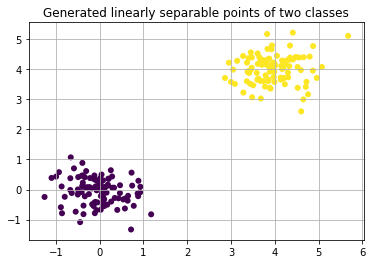

In [35]:
fig, ax = plt.subplots()
ax.scatter(x = dataset[:,0], y = dataset[:,1], c=classes, label=classes, edgecolors='none')
ax.grid(True)
ax.set_title('Generated linearly separable points of two classes')
plt.show()

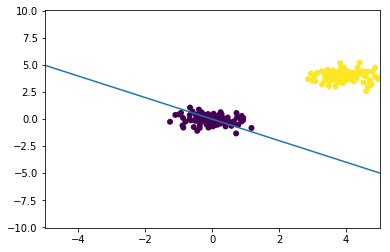

In [36]:
weights_list_biais_0 = np.concatenate([weights_list_lp.T,[np.zeros(len(weights_list_lp[:,0]))]]).T
x_min_lp, x_max_lp, y_min_lp, y_max_lp = from_Weights_List_To_Points(weights_list_biais_0, -5, 5)
animation_lines(x_min_lp, x_max_lp, y_min_lp, y_max_lp)

The problem is that in this case it has to pass by (0,0)

#### 3.1.3 Classifcation of samples that are not linearly separable

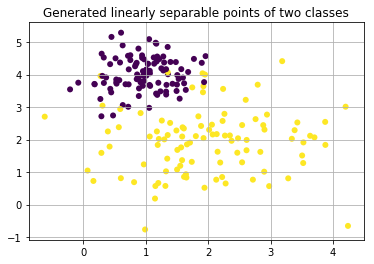

In [37]:
dataset, classes = generate_points(n = 100, m_A = [2., 2], m_B = [1, 4], sigma_A = 1, sigma_B = 0.5)
fig, ax = plt.subplots()
ax.scatter(x = dataset[:,0], y = dataset[:,1], c=classes, label=classes, edgecolors='none')
ax.grid(True)
ax.set_title('Generated linearly separable points of two classes')
plt.show()

In [38]:
weights = initialize_weights(n_row = 1, n_col = 3)
eta = 0.001
dataset_biais = with_biais(np.transpose(dataset))

new_weights_lp, error_lp, weights_list_lp = learning_perceptron_epochs(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
new_weights_dr, error_dr, weights_list_dr = delta_rule_epochs_2(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)
new_weights_dr_1by1, error_dr_1by1, weights_list_dr_1by1 = delta_rule_epochs_1by1(epochs = 20, patterns= dataset_biais,
                                                      targets=classes,weights= weights,eta=eta)

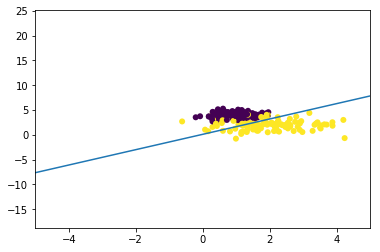

In [39]:
x_min_lp, x_max_lp, y_min_lp, y_max_lp = from_Weights_List_To_Points(weights_list_dr_1by1, -5, 5)
animation_lines(x_min_lp, x_max_lp, y_min_lp, y_max_lp)

In [40]:
best_avg_lp, best_avg_dr, best_avg_dr_1by1 = [], [], []

for i in range(20):
    best_lp, best_dr, best_dr_1by1 = [], [], []
    for j in range(10):
        dataset, classes = generate_points(n = 100, m_A = [2., 2], m_B = [-2, -2], sigma_A = 0.5+i/10, sigma_B = 0.5)
        weights = initialize_weights(n_row = 1, n_col = 3)
        eta = 0.001
        dataset_biais = with_biais(np.transpose(dataset))

        new_weights_lp, error_lp, weights_list_lp = learning_perceptron_epochs(epochs = 20, patterns= dataset_biais,
                                                          targets=classes,weights= weights,eta=eta)
        new_weights_dr, error_dr, weights_list_dr = delta_rule_epochs_2(epochs = 20, patterns= dataset_biais,
                                                          targets=classes,weights= weights,eta=eta)
        new_weights_dr_1by1, error_dr_1by1, weights_list_dr_1by1 = delta_rule_epochs_1by1(epochs = 20, patterns= dataset_biais,
                                                          targets=classes,weights= weights,eta=eta)
        best_lp.append(np.min(error_lp))
        best_dr.append(np.min(error_dr))
        best_dr_1by1.append(np.min(error_dr_1by1))
        
    best_avg_lp.append(np.mean(best_lp))
    best_avg_dr.append(np.mean(best_dr))
    best_avg_dr_1by1.append(np.mean(best_dr_1by1))

sigma_A_values = [0.5+i/10 for i in range(20)]
fig, ax = plt.subplots()
plt.plot(sigma_A_values, best_avg_lp, label = 'learning perceptron')
plt.plot(sigma_A_values, best_avg_dr, label = 'delta')
plt.plot(sigma_A_values, best_avg_dr_1by1, label = 'delta 1 by 1')
ax.legend()
ax.set_title('Error of labeling after 20 Epoch, by sigma_A')
ax.set_xlabel('sigma_A')
ax.set_ylabel('Number of points mislabeled on 200')
plt.show()

SyntaxError: invalid syntax (<ipython-input-40-3b5a902dce7d>, line 34)


##### Second part with input given

In [41]:
n= 100
m_A, sigma_A = [1, 0.3], 0.2
m_B, sigma_B = [0, -0.1], 0.3
class_A = np.array([np.concatenate([np.random.randn(1,n//2)*sigma_A - m_A[0],np.random.randn(1,n//2)*sigma_A + m_A[0]], axis = 1)[0,:],
                    np.random.randn(n)*sigma_A + m_A[1]]).T
class_B = np.array([np.random.randn(n)*sigma_B + m_B[0], np.random.randn(n)*sigma_B + m_B[1]]).T

    # Shuffling
dataset_ini = np.concatenate([class_A, class_B])
classes_ini = np.array([1]*n+[-1]*n)
seq = [i for i in range(len(dataset_ini))]
np.random.shuffle(seq)
dataset = dataset_ini[seq]
classes = classes_ini[seq]

Last number of errors:  163


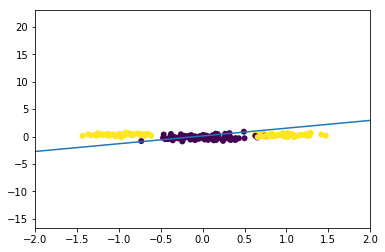

In [42]:
weights = initialize_weights(n_row = 1, n_col = 3)
eta = 0.001
dataset_biais = with_biais(np.transpose(dataset))

new_weights_dr, error_dr, weights_list_dr = delta_rule_epochs_2(epochs = 20, patterns= dataset_biais,
                                                          targets=classes,weights= weights,eta=eta)
print('Last number of errors: ',error_dr[-1])
x_min_lp, x_max_lp, y_min_lp, y_max_lp = from_Weights_List_To_Points(weights_list_dr_1by1, -2, 2)
animation_lines(x_min_lp, x_max_lp, y_min_lp, y_max_lp)

##### Several scenarios for sampling

Random 25% from each class

In [104]:
def performance_on_sampling(dataset, classes, iterations, seq, nn_fun):

    weights = initialize_weights(n_row = 1, n_col = 3)
    eta = 0.001

    error_avg_dr_1by1 = []

    for k in range(iterations):
        dataset_sampled = dataset[seq,:]
        dataset_biais_sampled = with_biais(np.transpose(dataset_sampled))
        classes_sampled = classes[seq]


        new_weights_dr_1by1, error_dr_1by1, weights_list_dr_1by1 = nn_fun(epochs = 20, patterns= dataset_biais_sampled,
                                                                  targets=classes_sampled,weights= weights,eta=eta)
        error_avg_dr_1by1.append(error_dr_1by1[-1])

    print('Median number of errors: ',np.median(error_avg_dr_1by1))

In [101]:
seq = np.random.choice([i for i in range(200)], 150, replace = False)
    
performance_on_sampling(dataset, classes, 100, seq, delta_rule_epochs_1by1)

Median number of errors:  50.0


Random 50% from class A

In [102]:
seq = np.concatenate([np.random.choice(np.where(classes==1)[0], 50, replace = False), np.where(classes!=1)[0]])

performance_on_sampling(dataset, classes, 100, seq, delta_rule_epochs_1by1)

Median number of errors:  94.0


Random 50% from class B

In [103]:
seq = np.concatenate([np.random.choice(np.where(classes==-1)[0], 50, replace = False), np.where(classes==1)[0]])

performance_on_sampling(dataset, classes, 100, seq, delta_rule_epochs_1by1)

Median number of errors:  78.0


20% of class_A < 0 and 80% of class_A > 0

In [105]:
cond_1 = np.where(dataset[:,0] > 0)
cond_2 = np.where(classes==1)
cond = np.intersect1d(cond_1,cond_2)
seq1 = np.random.choice(cond, 40, replace = False)
    
cond_1 = np.where(dataset[:,0] <= 0)
cond_2 = np.where(classes==1)
cond = np.intersect1d(cond_1,cond_2)
seq2 = np.random.choice(cond, 10, replace = False)
    
seq = np.concatenate([seq1, seq2, np.where(classes!=1)[0]])

performance_on_sampling(dataset, classes, 100, seq, delta_rule_epochs_1by1)

Median number of errors:  58.0


### 3.2 Classication and regression with a two-layer perceptron

#### 3.2.1 Classification of linearly non-separable data

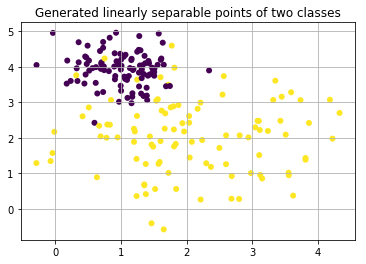

In [111]:
dataset, classes = generate_points(n = 100, m_A = [2., 2], m_B = [1, 4], sigma_A = 1, sigma_B = 0.5)
fig, ax = plt.subplots()
ax.scatter(x = dataset[:,0], y = dataset[:,1], c=classes, label=classes, edgecolors='none')
ax.grid(True)
ax.set_title('Generated linearly separable points of two classes')
plt.show()

In [206]:
def fwd_bwd_wup(patterns, targets, weights, weights_hidden, eta, n_hidden, epochs, alpha):
    w = np.array(weights)
    v = np.array(weights_hidden)
    dw, dv = 0, 0
    patterns_biais = with_biais(patterns)
    for i in range(epochs):
        # forward pass
        h_in = w @ patterns_biais
        h_out = with_biais(phi(h_in))
        o_in = v @ h_out
        o_out = phi(o_in)

        # backward pass
        delta_o = (o_out-targets) * (1+o_out) * (1-o_out) * 0.5
        delta_h = (v.T @ delta_o) * ((1 + h_out) * (1 - h_out)) * 0.5
        delta_h = delta_h[range(n_hidden),:]

        # weights update
        dw = (dw * alpha) - (delta_h @ patterns_biais.T) * (1-alpha)
        dv = (dv * alpha) - (delta_o @ h_out.T) * (1-alpha)
        w += dw * eta
        v += dv * eta
        
    return(w,v)

def fast_forward(patterns, w, v):
    h_in = w @ with_biais(patterns)
    h_out = with_biais(phi(h_in))
    o_in = v @ h_out
    o_out = phi(o_in)
    return(o_out)

def check_errors(patterns, classes, new_w, new_v):
    ans = fast_forward(patterns, new_w, new_v)
    error_label = int(np.sum(abs(np.sign(ans)-classes)/2))
    error_mean_square = np.sum((ans-classes)**2)
    return(error_label, error_mean_square)

def test_multi_layer(epochs_list, dataset, classes, n_hidden_list, test_dataset, test_classes):
    error_epoch_label_list, error_epoch_mean_square_list = [], []
    for epoch in epochs_list:
        error_avg_label_list, error_avg_mean_square_list = [], []
        for i in n_hidden_list:
            error_label_list, error_mean_square_list = [], []
            for j in range(10):
                n_hidden = i
                w = initialize_weights(n_row = n_hidden, n_col = 3)
                v = initialize_weights(n_row = 1, n_col = n_hidden + 1)

                new_w, new_v = fwd_bwd_wup(patterns = dataset.T, targets = classes, weights = w, weights_hidden = v,
                            eta = 0.001, n_hidden = n_hidden, epochs = epoch, alpha = 0.9)


                error_label, error_mean_square = check_errors(test_dataset.T, test_classes, new_w, new_v)
                error_label_list.append(error_label)
                error_mean_square_list.append(error_mean_square)

            error_avg_label_list.append(np.median(error_label_list))
            error_avg_mean_square_list.append(np.median(error_mean_square_list))

        error_epoch_label_list.append(error_avg_label_list)
        error_epoch_mean_square_list.append(error_avg_mean_square_list)
        
    return(error_epoch_label_list, error_epoch_mean_square_list)

In [202]:
epochs_list = [20, 100]
n_hidden_list = [i for i in range(1,11)]

error_epoch_label_list, error_epoch_mean_square_list = test_multi_layer(classes=classes, dataset=dataset,test_classes= classes, 
                                                                        test_dataset = dataset, epochs_list=epochs_list,
                                                                        n_hidden_list= n_hidden_list)

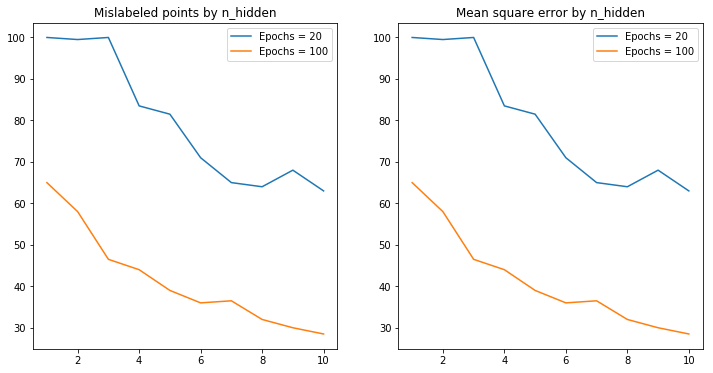

In [176]:
fig, axs = plt.subplots(1,2,figsize=(12, 6))
axs[0].plot(n_hidden_list, error_epoch_label_list[0], label='Epochs = 20')
axs[0].plot(n_hidden_list, error_epoch_label_list[1], label='Epochs = 100')
axs[0].set_title('Mislabeled points by n_hidden')
axs[0].legend()
axs[1].plot(n_hidden_list, error_epoch_label_list[0], label='Epochs = 20')
axs[1].plot(n_hidden_list, error_epoch_label_list[1], label='Epochs = 100')
axs[1].set_title('Mean square error by n_hidden')
axs[1].legend()
plt.show()

##### 2 Using the sampling again

In [177]:
n= 100
m_A, sigma_A = [1, 0.3], 0.2
m_B, sigma_B = [0, -0.1], 0.3
class_A = np.array([np.concatenate([np.random.randn(1,n//2)*sigma_A - m_A[0],np.random.randn(1,n//2)*sigma_A + m_A[0]], axis = 1)[0,:],
                    np.random.randn(n)*sigma_A + m_A[1]]).T
class_B = np.array([np.random.randn(n)*sigma_B + m_B[0], np.random.randn(n)*sigma_B + m_B[1]]).T

    # Shuffling
dataset_ini = np.concatenate([class_A, class_B])
classes_ini = np.array([1]*n+[-1]*n)
seq = [i for i in range(len(dataset_ini))]
np.random.shuffle(seq)
dataset = dataset_ini[seq]
classes = classes_ini[seq]

In [207]:
seq1 = np.random.choice([i for i in range(200)], 150, replace = False)
seq2 = np.concatenate([np.random.choice(np.where(classes==1)[0], 50, replace = False), np.where(classes!=1)[0]])
seq3 = np.concatenate([np.random.choice(np.where(classes==-1)[0], 50, replace = False), np.where(classes==1)[0]])
cond_1 = np.where(dataset[:,0] > 0)
cond_2 = np.where(classes==1)
cond = np.intersect1d(cond_1,cond_2)
seq41 = np.random.choice(cond, 40, replace = False)
    
cond_1 = np.where(dataset[:,0] <= 0)
cond_2 = np.where(classes==1)
cond = np.intersect1d(cond_1,cond_2)
seq42 = np.random.choice(cond, 10, replace = False)
    
seq4 = np.concatenate([seq41, seq42, np.where(classes!=1)[0]])

epochs_list = [20, 100]
n_hidden_list = [i for i in range(1,11)]

seqs = [seq1, seq2, seq3, seq4]

error_seq_label_list = []
error_seq_mean_square_list = []

for seq in seqs:
    train_dataset = dataset[seq,:]
    test_dataset = dataset[np.setdiff1d(np.array([i for i in range(200)]), seq),:]
    train_classes = classes[seq]
    test_classes = classes[np.setdiff1d(np.array([i for i in range(200)]), seq)]

    error_epoch_label_list, error_epoch_mean_square_list = test_multi_layer(classes= train_classes, dataset= train_dataset,
                                                                            test_classes= test_classes, 
                                                                            test_dataset = test_dataset, epochs_list=epochs_list,
                                                                            n_hidden_list= n_hidden_list)
    error_seq_label_list.append(error_epoch_label_list)
    error_seq_mean_square_list.append(error_epoch_mean_square_list)

In [208]:
error_seq_label_list

[[[28.0, 26.0, 22.5, 25.0, 21.5, 16.0, 18.0, 17.0, 18.5, 26.0],
  [17.5, 15.0, 14.0, 14.5, 11.5, 13.5, 13.0, 13.0, 14.0, 13.5]],
 [[50.0, 36.5, 42.5, 28.0, 34.5, 23.5, 38.5, 28.5, 28.0, 26.0],
  [50.0, 38.0, 33.5, 34.0, 29.5, 30.5, 30.5, 27.5, 30.0, 27.0]],
 [[50.0, 50.0, 50.0, 33.5, 8.5, 50.0, 36.0, 48.5, 43.5, 48.5],
  [50.0, 43.0, 50.0, 41.5, 42.5, 33.0, 35.0, 36.5, 28.5, 28.5]],
 [[5.0, 45.0, 9.5, 26.0, 41.5, 33.0, 43.5, 42.5, 50.0, 46.0],
  [46.0, 47.0, 41.0, 44.5, 41.0, 41.5, 41.0, 41.0, 41.0, 41.0]]]

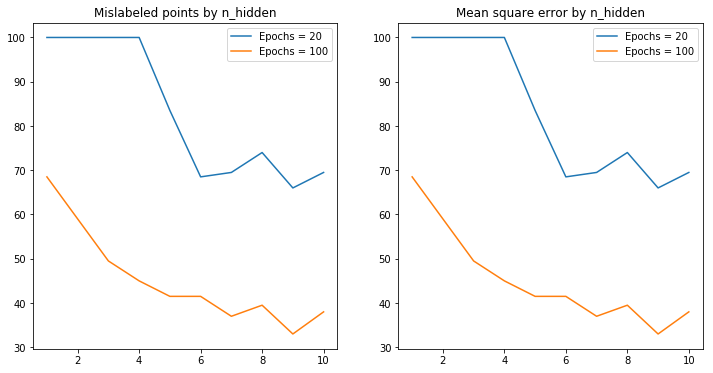

In [180]:
fig, axs = plt.subplots(1,2,figsize=(12, 6))
axs[0].plot(n_hidden_list, error_seq_label_list[0], label='Epochs = 20')
axs[0].plot(n_hidden_list, error_epoch_label_list[1], label='Epochs = 100')
axs[0].set_title('Mislabeled points by n_hidden')
axs[0].legend()
axs[1].plot(n_hidden_list, error_epoch_label_list[0], label='Epochs = 20')
axs[1].plot(n_hidden_list, error_epoch_label_list[1], label='Epochs = 100')
axs[1].set_title('Mean square error by n_hidden')
axs[1].legend()
plt.show()

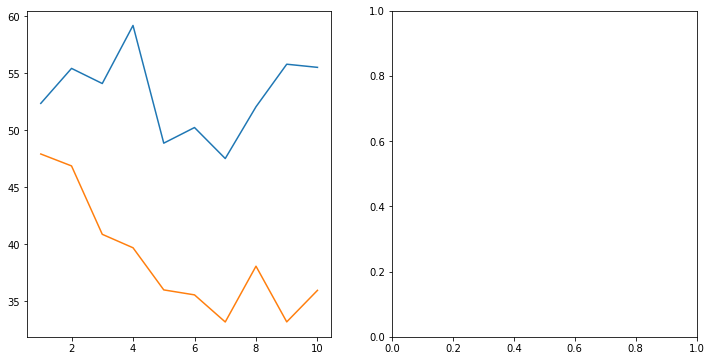

In [212]:
fig, axs = plt.subplots(1,2,figsize=(12, 6))
for i in error_seq_mean_square_list[0]:
    axs[0].plot(n_hidden_list, i, label='Epochs = 20')

In [198]:
test_dataset.shape

(50, 2)